In [1]:
import os 
from matplotlib import pyplot as plt
from natsort import natsorted

In [2]:
ROOT_DIR = "../../output/20240811_v6_ckpt_from_new_code_repeat2/val_unslpash-trainset/1.0/no_consistnacy"

plot_id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] losses:  [0.1204538598501434, 0.1204842359189772, 0.12051888948513402, 0.1205775892155038, 0.12067783638938434, 0.1207867161422554, 0.120905472477898, 0.12104286635811957, 0.12123782719588942, 0.1213799979330765, 0.12159272068076664, 0.12176648672256205, 0.12203843102066053, 0.12234621403945817, 0.12247678363023119, 0.12279346984707647, 0.12307619388060023, 0.12336532057573397, 0.12346655444707721, 0.12364310148792962, 0.12377349155334134, 0.12393336480793854, 0.12419209369561739, 0.12438245026084284]
min_loss_id:  0
min_loss:  0.1204538598501434
min_plot_id:  1


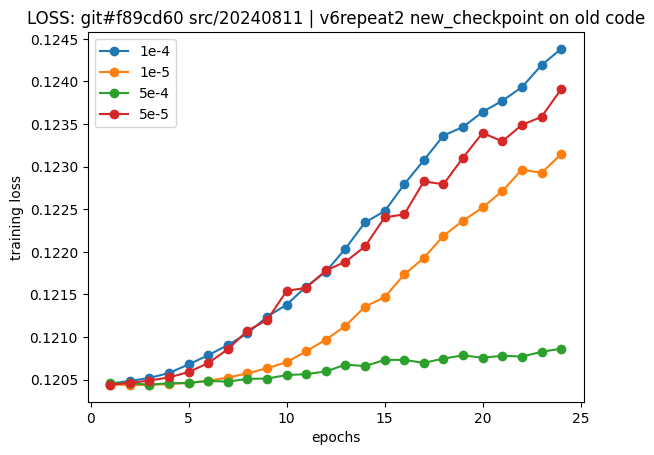

In [5]:
LRs = natsorted(os.listdir(ROOT_DIR))  
for lr in LRs:
    checkpoints = natsorted(os.listdir(os.path.join(ROOT_DIR, lr)))
    checkpoints = ["chk{}".format(i) for i in range(1,25)]
    checkpoint_id = []
    avg_losses = []
    for checkpoint in checkpoints:
        # read all text files in directory and average to single float
        all_losses = []
        step_root_dir = os.path.join(ROOT_DIR, lr, checkpoint, 'lightning_logs/version_0/train_loss')
        step_dirs = natsorted(os.listdir(step_root_dir))
        for step_id in step_dirs:     
            for file in os.listdir(os.path.join(step_root_dir, step_id)):
                if file.endswith(".txt"):
                    with open(os.path.join(step_root_dir, step_id, file), 'r') as f:
                        all_losses.append(float(f.read()))       
        avg_loss = sum(all_losses) / len(all_losses)
        avg_losses.append(avg_loss)
        checkpoint_id.append(int(checkpoint.replace("chk","")))
    plt.plot(checkpoint_id, avg_losses, 'o-', label=lr)
    if lr == "1e-4":
        print("plot_id: ", checkpoint_id, "losses: ", avg_losses)
        # find the location that has the lowest loss
        min_loss = min(avg_losses)
        min_loss_id = avg_losses.index(min_loss)
        print("min_loss_id: ", min_loss_id)
        print("min_loss: ", min_loss)
        # print min plot_id
        print("min_plot_id: ", checkpoint_id[min_loss_id])
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("training loss")
    #plt.title("Training loss average on timesteps [100,200,...,900]")
    plt.title("LOSS: git#f89cd60 src/20240811 | v6repeat2 new_checkpoint on old code")